# Исследование объявлений о продаже квартир

Доступны данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Ход исследования**

Данные сервиса Яндекс.Недвижимость необходимо изучить и провести преобработку данных. Затем осуществить исследовательский анализ данных и написать общий вывод.

Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Вывод.

### 1. Откройте файл с данными и изучите общую информацию. 

#### 1.1 Импорт необходимых библиотек.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 1.2 Открытие файла.

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t', engine='python')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\\t', engine='python')

#### 1.3 Вывод первых десяти строк таблицы.

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### 1.4 Вывод основной информации о датафрейме. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### 1.5 Построение гистограмм для всех столбцов датафрейма.

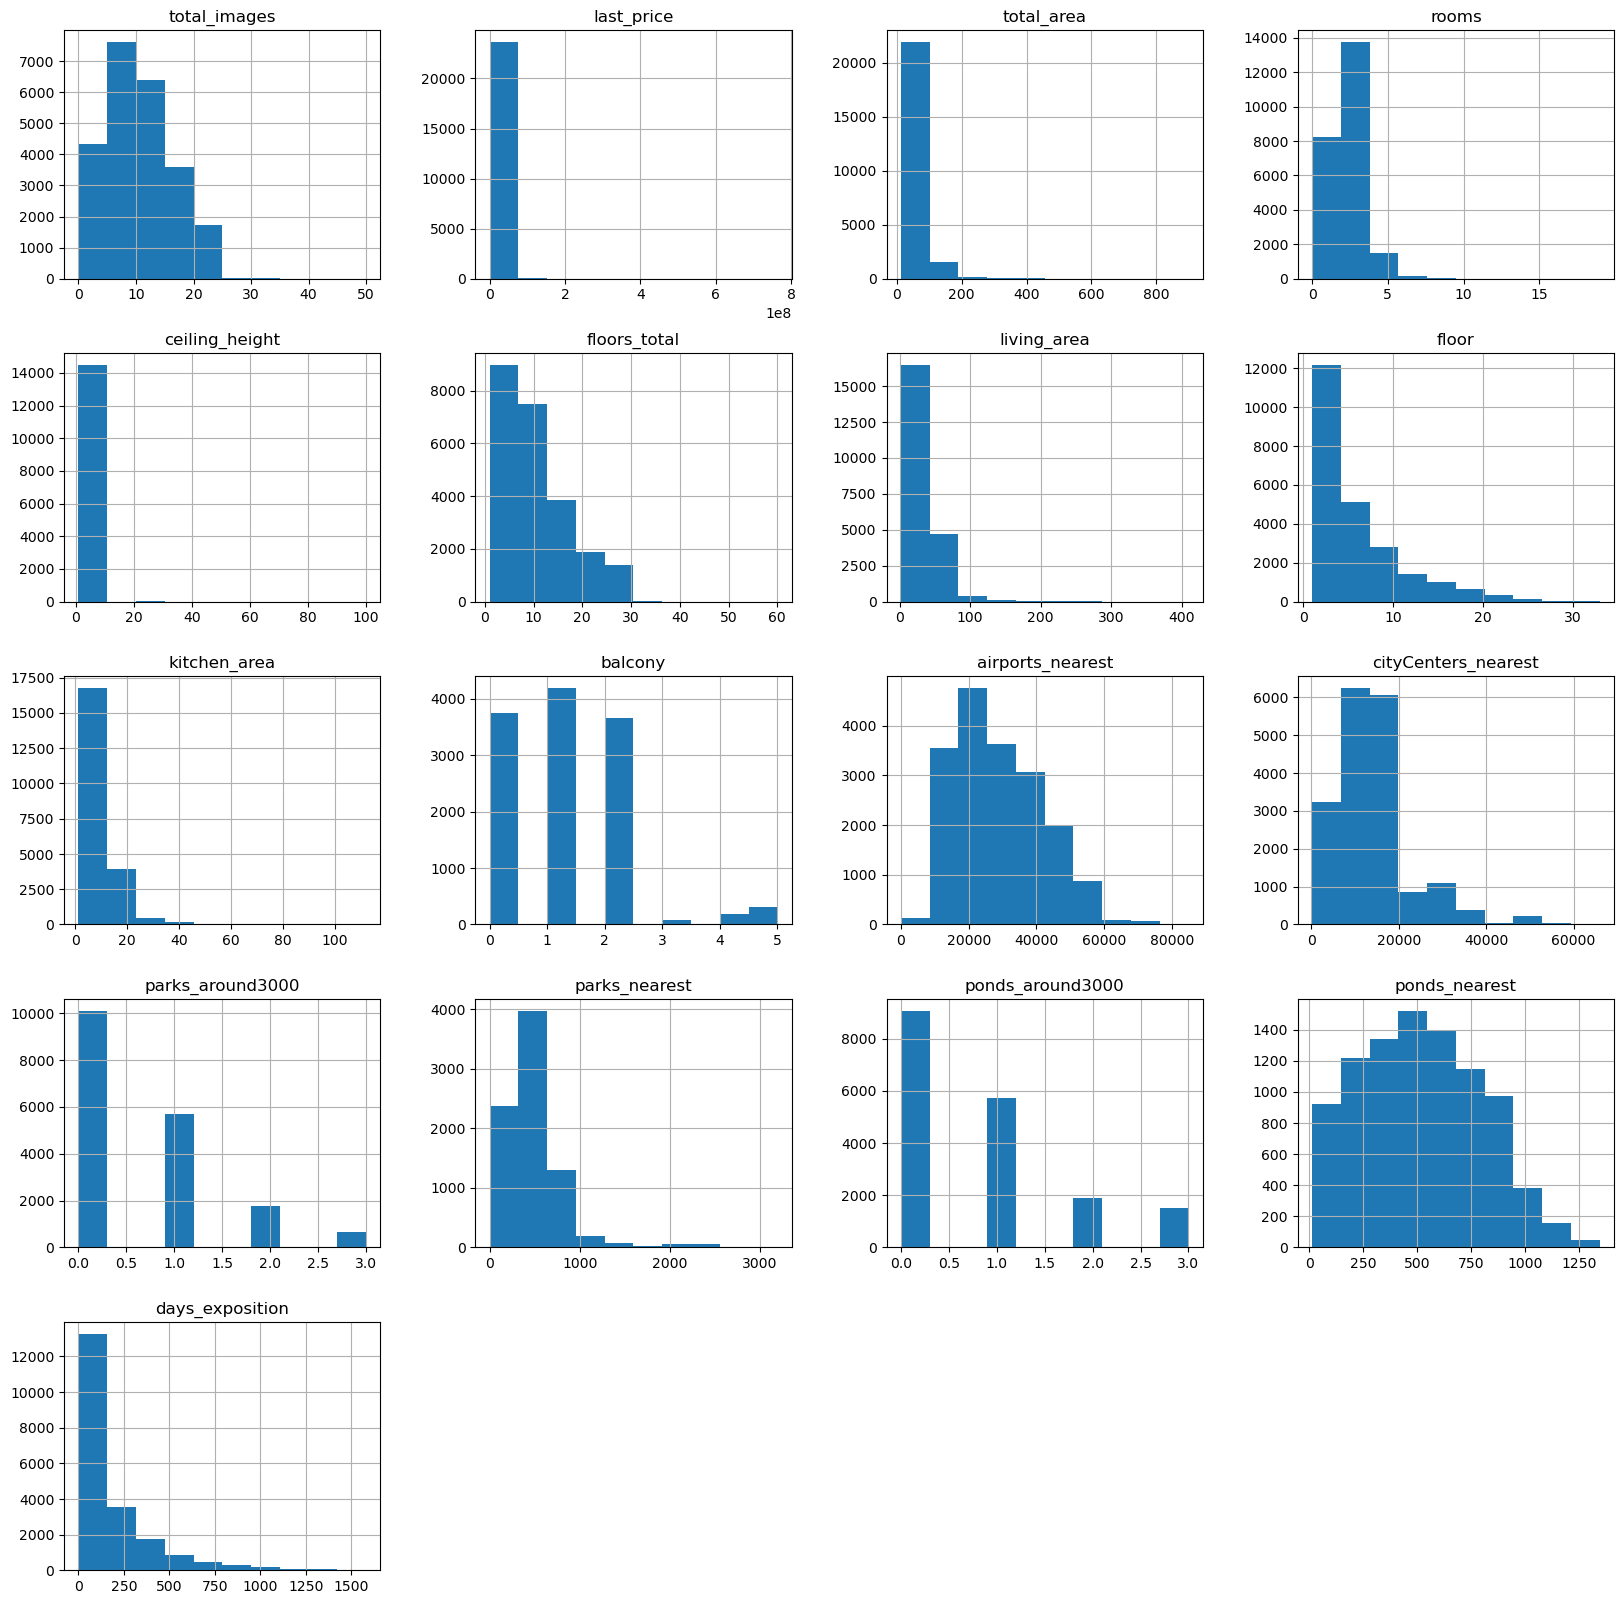

In [6]:
data.hist(figsize=(20,20));

#### 1.6 Вывод

Итак, в таблице двадцать два столбца.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;  
* `ceiling_height` — высота потолков в метрах (м);
* `cityCenters_nearest` — расстояние до центра города в метрах (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населенного пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма в метрах (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);
* `total_area` — общая площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении.

Количество значений в столбцах различается, значит, в данных есть пропущенные значения, а на выводе первых десяти строк таблицы уже заметны неверные типы данных. Данных достаточно для последующего анализа, но сперва необходимо их обработать.

### 2. Предобработка данных

#### 2.1 Обработка пропусков

In [7]:
data.isna().sum() #определение количества пропусков в датафрейме

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверим количество пропусков в процентах:

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


В столбце с количеством балконов (`balcony`) 11519 пропусков. Можно их заменить на 0, так как вероятно, что продавцы не указывали количество балконов ввиду их отсутствия.

In [9]:
data['balcony'] = data['balcony'].fillna(0)

То же и для столбца `is_apartment` — недвижимость не является апартаментами, из-за чего можно предположить, что продавец не стал указывать это совсем.

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Для столбцов с расстояниями очень много пропусков. Это картографические данные, поэтому самостоятельно рассчитать их невозможно, а если брать среднее значение или медиану, то репрезентативность выборки упадет (особенно в случаях со столбцами `parks_nearest` и `ponds_nearest`, так как в них пропусков больше 60%).

В случае со столбцом `airports_nearest` можно еще предположить, что в населенном пункте его нет.

In [11]:
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)

В столбцах `parks_around3000` и `ponds_around3000` обозначено количество парков и водоемов в радиусе трех километров. Так же как и с `airport_nearest`, вероятно, что парков и водоемов поблизости нет.

In [12]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

В столбце `days_exposition` содержатся данные о количестве дней, в течение которых объявление было размещено от публикации до снятия. Можно предположить, что из-за человеческого фактора столбец недозаполнен.

In [13]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

Немного пропусков есть в столбце `locality_name` и `floors_total`. Возможности указать правильное название населенного пункта, как и количества этажей в доме, нет, поэтому стоит вписать вместо них "не указано" и -1.

In [14]:
data['locality_name'] = data['locality_name'].fillna('Не указано')

In [15]:
data['floors_total'] = data['floors_total'].fillna(-1) 

Для столбцов `living_area` и `kitchen_area` пропуски можно заполнить с помощью cтолбца `total_area`. Посчитаем отношение жилой площади ко всей площади и отношение площади кухни ко всей площади для каждого объявления.  

In [16]:
data['conversion_living'] = data['living_area'] / data['total_area']
data['conversion_kitchen'] = data['kitchen_area'] / data['total_area']

Затем для объявлений с определенным количеством комнат заполним пропуски произведением медианы конверсий на общую площадь квартиры каждого объявления.

In [17]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room), 'conversion_living'].median() * \
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'total_area']
    
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == room), 'conversion_kitchen'].median() * \
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'total_area']

В столбце `kitchen_area` еще остались пропуски. Но заметим одну интересную особенность:

In [18]:
data[(data['rooms'] == 0) & (data['kitchen_area'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,conversion_living,conversion_kitchen
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.500000,2,False,...,посёлок Мурино,-1.0,-1.0,0.0,-1.0,0.0,-1.0,181.0,0.574074,NaN
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.000000,1,False,...,деревня Кудрово,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,0.680000,NaN
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.750000,4,False,...,Санкт-Петербург,38171.0,15015.0,0.0,-1.0,2.0,982.0,64.0,0.912947,NaN
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.300000,19,False,...,посёлок Парголово,53115.0,19292.0,0.0,-1.0,1.0,593.0,430.0,0.706395,NaN
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,17.241379,7,False,...,посёлок Шушары,-1.0,-1.0,0.0,-1.0,0.0,-1.0,29.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.000000,16,False,...,Санкт-Петербург,11405.0,13222.0,0.0,-1.0,1.0,623.0,14.0,0.692308,NaN
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.000000,4,False,...,посёлок Мурино,-1.0,-1.0,0.0,-1.0,0.0,-1.0,4.0,0.649819,NaN
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,17.931034,8,False,...,Санкт-Петербург,18090.0,17092.0,0.0,-1.0,2.0,112.0,31.0,NaN,NaN
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.000000,8,False,...,Никольское,-1.0,-1.0,0.0,-1.0,0.0,-1.0,82.0,0.620690,NaN


In [19]:
data['kitchen_area'].isna().sum()

197

Количество пропусков в `kitchen_area` совпадает с количеством строк в датафрейме, в котором нет комнат, так что в таких объявлениях скорее всего площадь кухни включена в жилую площадь. Значит, оставшиеся пропуски можно заполнить нулями.

In [20]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

Столбец с высотой потолков `ceiling_height` имеет 9195 пропусков. Это не картографические данные, следовательно, возникли пропуски из-за человеческого фактора, но заполнить их корректно нет возможности, поэтому заполним их -1.

In [21]:
data['ceiling_height'] = data['ceiling_height'].fillna(-1)

In [22]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
conversion_living       1903
conversion_kitchen      2278
dtype: int64

#### 2.2 Изменение типов данных

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Уже в выводе первых десяти строк датафрейма был замечен тип object вместо datetime в столбце `first_day_exposition`. Исправим это с помощью метода `to_datetime`.

In [24]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

В столбцах `ponds_around3000`, `parks_around3000`, `balcony`, `days_exposition` и `floors_total` содержатся соответственно количества водоемов, парков, балконов, дней размещения объявления и этажей в доме. Они не могут быть вещественными числами, поэтому меняем их тип на int.

In [25]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

In [26]:
data['last_price'] = data['last_price'].astype('int')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### 2.3 Обработка дубликатов

Часто неявные дубликаты встречаются в строках, в данном датафрейме такой столбец `locality_name`. Выведем его уникальные отсортированные значения.

In [28]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Не указано',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'го

Дубликаты можно заметить в видах населенных пунктов, например, "Мурино", "поселок Мурино" и "посёлок Мурино", поэтому можно оставить только названия населенных пунктов.

In [29]:
data['locality_name'] = data['locality_name'].replace(r'([^А-Я]+)?([А-Я])(.+)?', r'\2\3', regex=True) 
#заменяем все данные в столбце 'locality_name' на названия населенных пунктов с помощью регулярных выражений

Чтобы убедиться, что в данном столбце не осталось еще неявных дубликатов, выведем отсортированные уникальные значения еще раз.

In [30]:
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

#### 2.4 Обработка аномальных значений

В столбце с высотой потолка `ceiling_height` был замечен очень странный разброс по значениям: от 1 до 100. Выведем уникальные отсортированные значения этого столбца.

In [31]:
data['ceiling_height'].sort_values().unique()

array([ -1.  ,   1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,
         2.34,   2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,
         2.51,   2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,
         2.59,   2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,
         2.67,   2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,
         2.75,   2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,
         2.83,   2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,
         2.91,   2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,
         2.99,   3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,
         3.07,   3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,
         3.15,   3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,
         3.24,   3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,
         3.32,   3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,
         3.4 ,   3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,
      

Можно предположить, что высота потолка от 20 и до 32 включительно была вписана по ошибке, и на самом деле это вещественные значения от 2.0 и до 3.2.

In [32]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

In [33]:
data['ceiling_height'].sort_values().unique()

array([-1.  ,  1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,
        2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,
        2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,
        2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,
        2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,
        2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,
        2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,
        2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,
        3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,
        3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,
        3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,
        3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,
        3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,
        3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,
        3.63,  3.65,

Высота потолка меньше 2 метров и больше 8 вызывает вопросы. Стоит удалить данные значения, так как восстановить корректные невозможно.

In [34]:
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 8), 'ceiling_height'] = -1

В столбце `last_price` также присутствует аномальное минимальное значение. Вероятно, это ошибка продавца: домножим на 1000.

In [35]:
data[data['last_price'] == data['last_price'].min()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,conversion_living,conversion_kitchen
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,Санкт-Петербург,36421.0,9176.0,1,805.0,0,-1.0,8,0.293578,0.37156


In [36]:
data.loc[data['last_price'] == data['last_price'].min(), 'last_price'] *= 1000

Проверим количество дубликатов:

In [37]:
data.duplicated().sum()

0

#### 2.5 Вывод
Предобработка обнаружила три проблемы в данных:

- пропущенные значения,
- неправильные типы данных,
- неявные дубликаты,
- аномальные значения.

Теперь можно перейти к исследовательскому анализу данных.

### 3. Посчитайте и добавьте в таблицу новые столбцы

In [38]:
#цена одного квадратного метра
data['meter_price'] = np.round(data['last_price'] / data['total_area'], 1)

In [39]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_week_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek

In [40]:
#месяц публикации объявления
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [41]:
#год публикации объявления
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [42]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
data.loc[data['floor'] == 1,'type_of_floor'] = 'первый'
data.loc[data['floor'] == data['floors_total'],'type_of_floor'] = 'последний'
data.loc[(data['floor'] != 1) & (data['floor'] != data['floors_total']), 'type_of_floor'] = 'другой'

In [43]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
data['cityCenter_km'] = round(data[data['cityCenters_nearest'] > 0]['cityCenters_nearest'] / 1000) 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

#### 3.1 Вывод 
Для последующего исследовательского анализа данных были добавлены следующие столбцы в датафрейм:
* `meter_price` — цена одного квадратного метра;
* `day_week_exposition` — день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* `month_exposition` — месяц публикации объявления;
* `year_exposition` - год публикации объявления;
* `type_of_floor` — тип этажа квартиры (значения — «первый», «последний», «другой»);
* `cityCenter_km` — расстояние до центра города в километрах.

### 4. Проведите исследовательский анализ данных

#### 4.1 Изучение параметров объектов через гистограммы.

##### 4.1.1 Общая площадь.

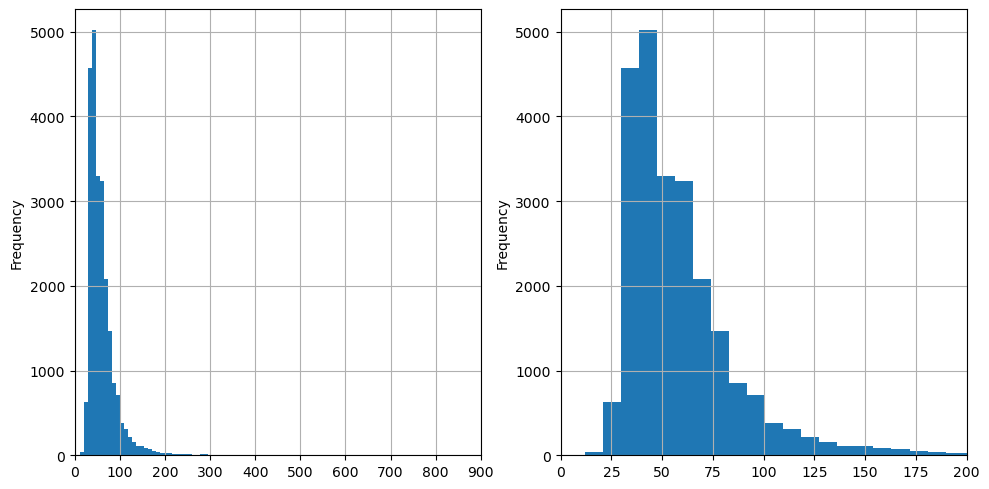

In [44]:
plt.subplot(1, 2, 1)
data['total_area'].plot(kind='hist', bins=100, xlim=(0,900), figsize=(10,5), grid=True)

plt.subplot(1, 2, 2)
data['total_area'].plot(kind='hist', bins=100, xlim=(0,200), grid=True)
plt.tight_layout()

Большинство квартир имеют площадь от 30 до 100 квадратных метров. Затем гистограмма идет на спад: чем больше площадь квартиры, тем меньше с такой площадью встречалось объявлений.

##### 4.1.2 Жилая площадь.

<AxesSubplot:ylabel='Frequency'>

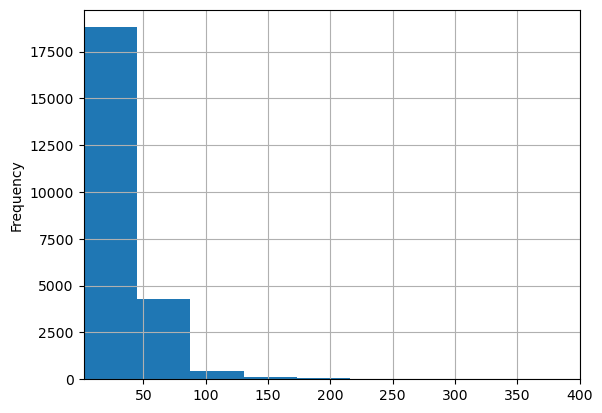

In [45]:
data['living_area'].plot(kind='hist', bins=10, xlim=(2,400), grid=True)

Чаще всего встречаются квартиры с жилой площадью от 2 квадратных метров и до 45 квадратных метров. Как и в случае с общей площадью, чем больше жилая площадь, тем меньше таких квартир встречалось.

##### 4.1.3 Площадь кухни

<AxesSubplot:ylabel='Frequency'>

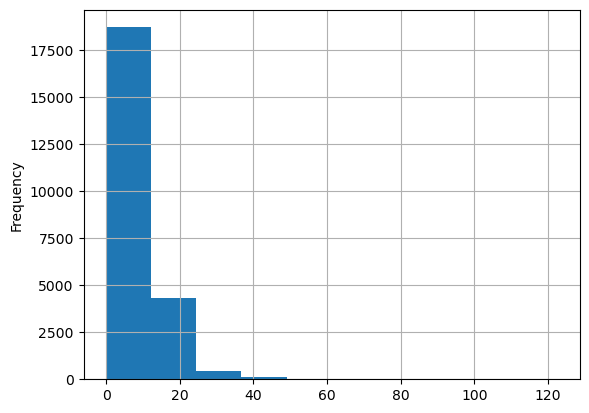

In [46]:
data['kitchen_area'].plot(kind='hist', bins=10, grid=True)

Большинство квартир имеют площадь кухни от нуля и до 10 квадратных метров. Нулевая площадь кухни, вероятно, связана с ее совмещением с жилой площадью.

##### 4.1.4 Цена объекта

<AxesSubplot:>

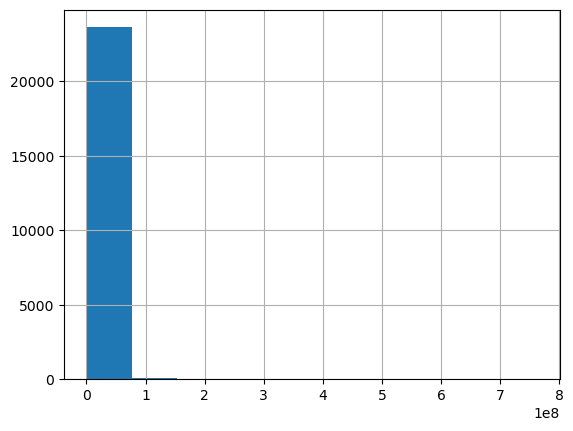

In [47]:
data['last_price'].hist(bins=10) #цена объекта

Подавляющее большинство квартир в данной таблице стоят менее ста миллионов.

##### 4.1.5 Количество комнат в квартире

<AxesSubplot:>

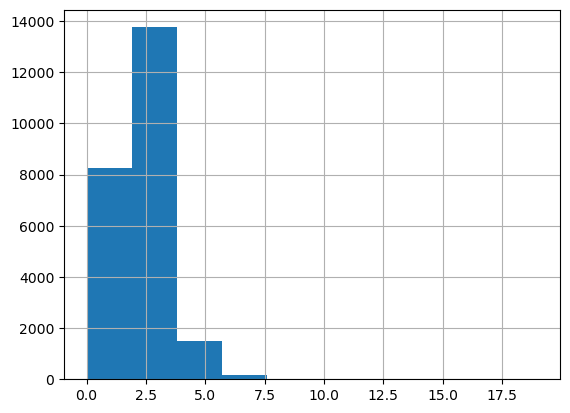

In [48]:
data['rooms'].hist(bins=10) #количество комнат в квартире

В квартирах на продажу зачастую встречается не более двух комнат, от пяти и выше комнат — намного реже.

##### 4.1.6 Высота потолка в квартире

<AxesSubplot:>

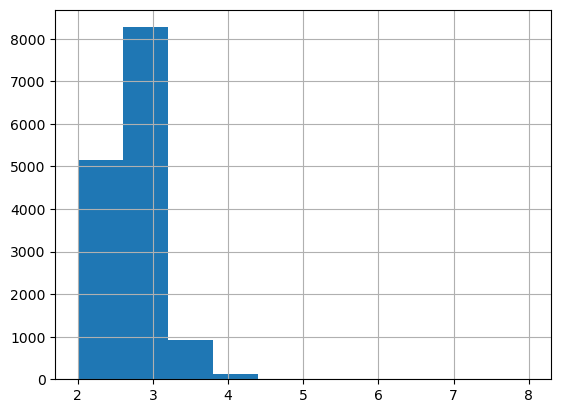

In [49]:
data.loc[data['ceiling_height'] > -1, 'ceiling_height'].hist(bins=10) #высота потолка в квартире

Самая часто встречающаяся высота потолков в квартирах от 2,5 метров и до 3,1 метров.

##### 4.1.7 Этаж квартиры

<AxesSubplot:>

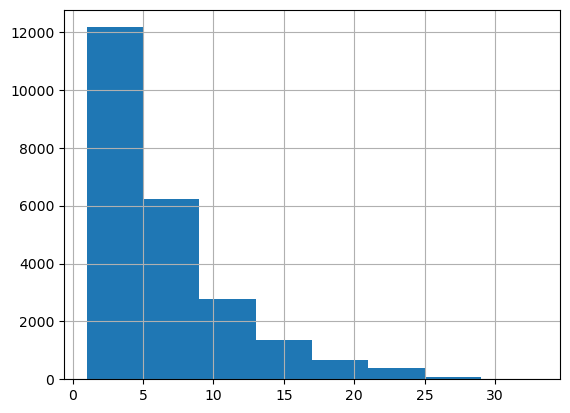

In [50]:
data.loc[data['floor'] > -1, 'floor'].hist(bins=8) #этаж квартиры

Самые часто встречающиеся этажи, на которых располагаются квартиры — от первого до пятого.

##### 4.1.8 Тип этажа квартиры

<AxesSubplot:>

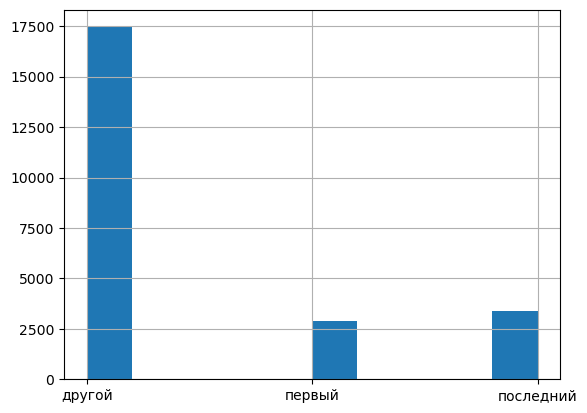

In [51]:
data['type_of_floor'].hist(bins=10) #тип этажа квартиры

Большинство квартир располагаются не на первом и не на последнем этаже. <a id='ft'></a>

##### 4.1.9 Общее количество этажей в доме

<AxesSubplot:>

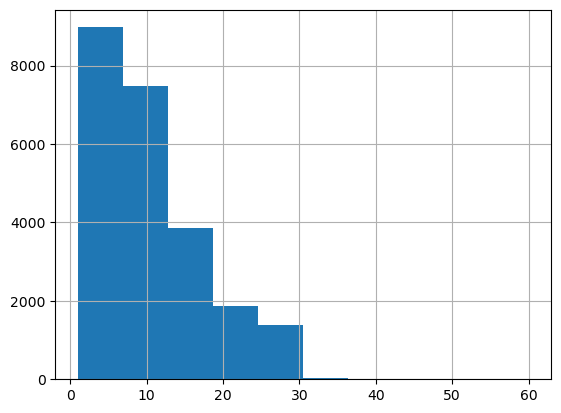

In [52]:
data.loc[data['floors_total'] > -1, 'floors_total'].hist(bins=10) #общее количество этажей в доме

Большинство квартир в датасете располагаются в домах, в которых в среднем пять этажей.

##### 4.1.10 Расстояние до центра города в метрах

<AxesSubplot:>

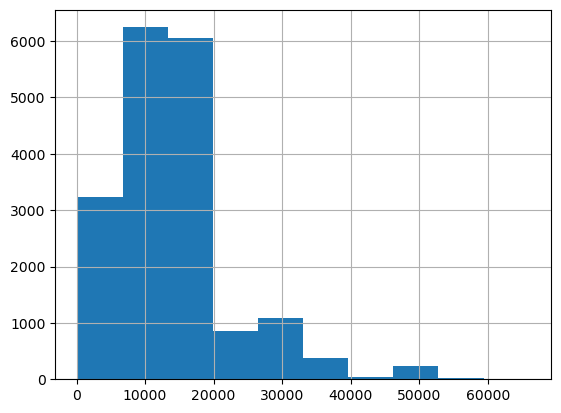

In [53]:
data.loc[data['cityCenters_nearest'] > -1, 'cityCenters_nearest'].hist(bins=10)

Больше всего квартир продавалось на расстоянии около 10000 метров от центра города, а меньше всего — на расстоянии 40000 метров и 60000 метров.

##### 4.1.11 Расстояние до ближайшего аэропорта

<AxesSubplot:>

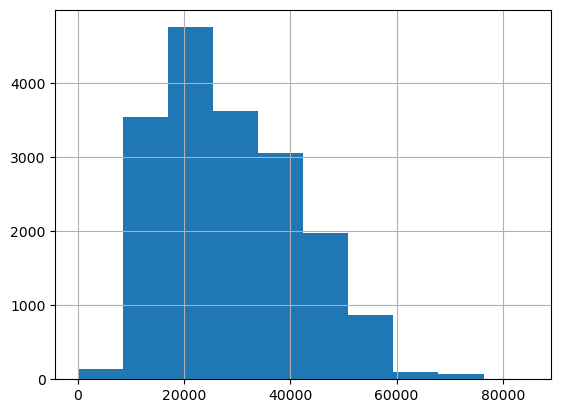

In [54]:
data.loc[data['airports_nearest'] > -1, 'airports_nearest'].hist(bins=10) 

Больше всего квартир продавалось на расстоянии около 20000 метров от ближайшего аэропорта, а меньше всего — на расстоянии более 60000 метров.

##### 4.1.12 Расстояние до ближайшего парка

<AxesSubplot:>

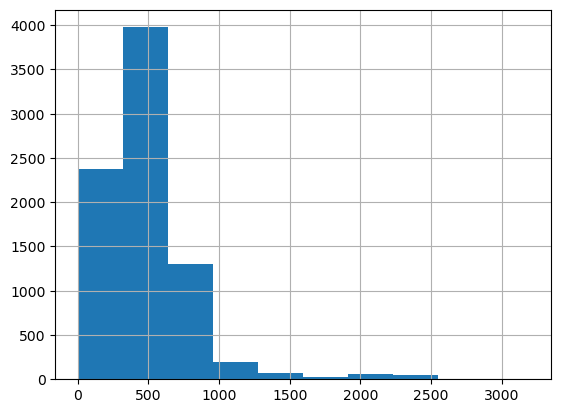

In [55]:
data.loc[data['parks_nearest'] > -1, 'parks_nearest'].hist(bins=10) #расстояние до ближайшего парка

Больше всего квартир продавалось на расстоянии около 500 метров от ближайшего парка, а меньше всего — на расстоянии более 1500 метров.

##### 4.1.13 День и месяц публикации объявления

<AxesSubplot:>

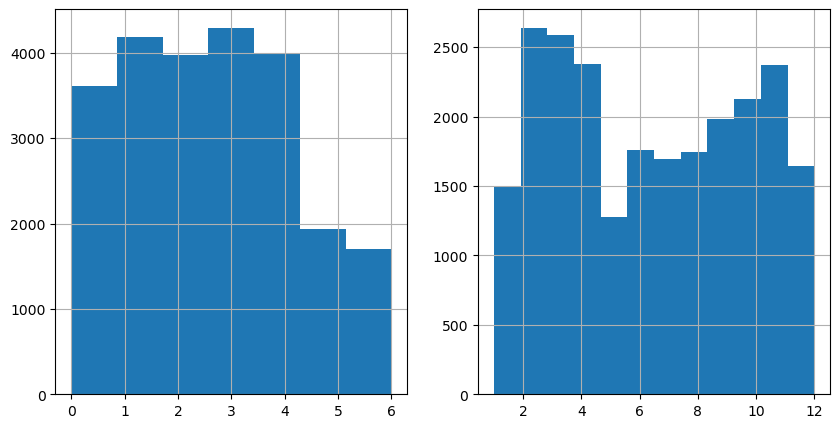

In [56]:
plt.subplot(1, 2, 1)
data['day_week_exposition'].hist(bins=7, figsize=(10,5)) #день публикации объявления

plt.subplot(1, 2, 2)
data['month_exposition'].hist(bins=12) #месяц публикации объявления

Большинство объявлений было опубликовано в такие дни недели как вторник и четверг, и в такие месяцы как февраль и март. По субботам и воскресеньям публикаций было меньше всего, как и в январе и в мае.

#### 4.2 Изучите, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.

<AxesSubplot:>

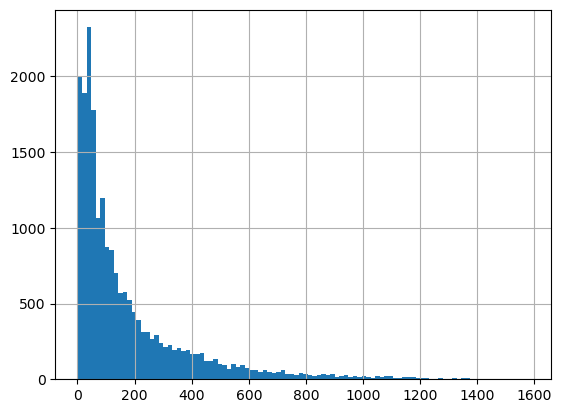

In [57]:
data.loc[data['days_exposition'] > -1, 'days_exposition'].hist(bins=100)

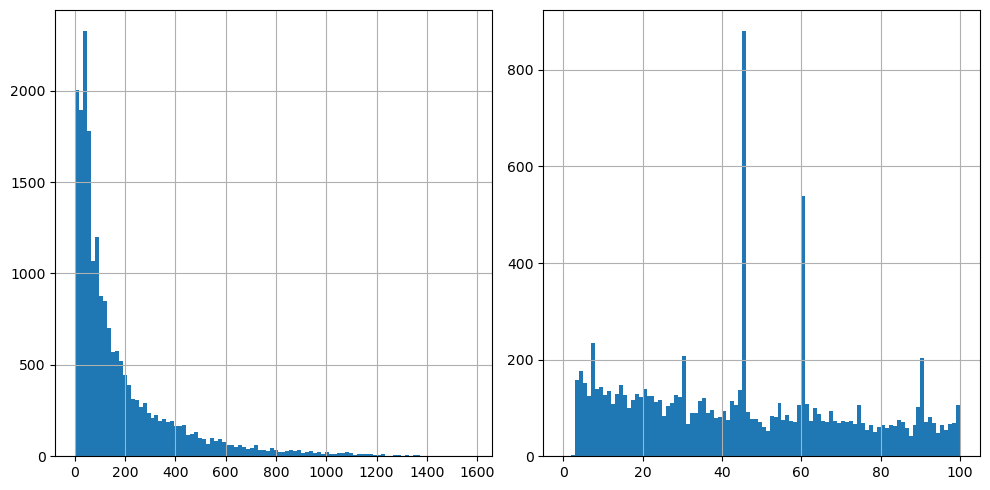

In [58]:
plt.subplot(1, 2, 1)
data.loc[data['days_exposition'] > -1, 'days_exposition'].hist(bins=100, figsize=(10,5), grid=True)

plt.subplot(1, 2, 2)
data.loc[data['days_exposition'] > -1, 'days_exposition'].hist(bins=100, range=(0,100),  grid=True)
plt.tight_layout()

Есть интересные аномалии около 45 и 60 дней. Эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил.

На графике можно заметить, что большинство квартир продавались за период от одного дня и до ста дней. Вычислим среднее значение и медиану столбца `days_exposition`.

In [59]:
print('Среднее значение: ', data.loc[data['days_exposition'] > -1, 'days_exposition'].mean())
print('Медиана: ', data.loc[data['days_exposition'] > -1, 'days_exposition'].median())

Среднее значение:  180.88863436982163
Медиана:  95.0


Таким образом, в среднем продажа занимает около 180 дней. Продажи до 95 дней можно считать быстрыми, а продажи от 400 дней - необычно долгими.

#### 4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Прежде чем рассматривать определенные факторы влияния, необходимо отметить, что в некоторых населенных пунктах какие-то факторы преобладают в большей степени, а какие-то в меньшей. Также важно учитывать, что количество объявлений из Санкт-Петербурга намного превышает количество обявлений из Ленинградской области. 

In [60]:
data.pivot_table(index='locality_name', values='last_price', aggfunc='count').sort_values(
    by='last_price', 
    ascending=False
).rename(
    columns={'last_price': 'ads_count'}
).head(15)

,ads_count
locality_name,
Санкт-Петербург,15721
Мурино,590
Кудрово,472
Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
Парголово,327
Гатчина,307


##### 4.3.1 Зависимость цены от общей площади.

In [61]:
price_on_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index()
price_on_total_area

,total_area,last_price
0,12.0,2400000.0
1,13.0,1850000.0
2,13.2,1686000.0
3,14.0,1190000.0
4,15.0,1725000.0
...,...,...
2177,590.0,65000000.0
2178,618.0,300000000.0
2179,631.0,140000000.0
2180,631.2,140000000.0


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

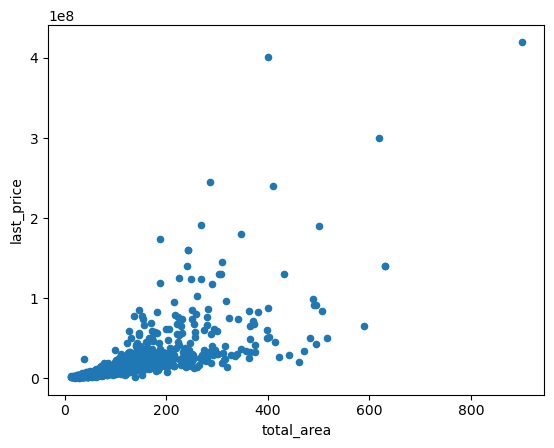

In [63]:
price_on_total_area.plot(x='total_area', y='last_price', kind='scatter')

In [64]:
print(price_on_total_area['total_area'].corr(price_on_total_area['last_price']))

0.7257910432358456


На графике основная масса точек расположена там, где малые площади и малая стоимость. Далее по графику идет более частый разброс точек. Следовательно, в среднем чем больше площадь, тем больше стоимость квартиры.

По корреляции Пирсона можно сказать, что зависимость между площадью квартиры и ценой достаточно высокая.

Вероятно, такие скачки цен на графике обусловлены населенными пунктами, где продается жилье, так как квартиры одинаковой площади в Санкт-Петербурге и в Ленинградской области будут стоить по-разному. В целом на графике видна тенденция к тому, что чем больше площадь квартиры, тем больше она будет стоить.

##### 4.3.2 Зависимость цены от жилой площади.

In [65]:
price_on_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index()
price_on_living_area

,living_area,last_price
0,2.000000,4340000.0
1,3.000000,34715000.0
2,5.000000,2680000.0
3,5.400000,6100000.0
4,6.000000,3799000.0
...,...,...
2621,339.705882,230000000.0
2622,347.500000,91500000.0
2623,409.000000,65000000.0
2624,409.700000,420000000.0


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

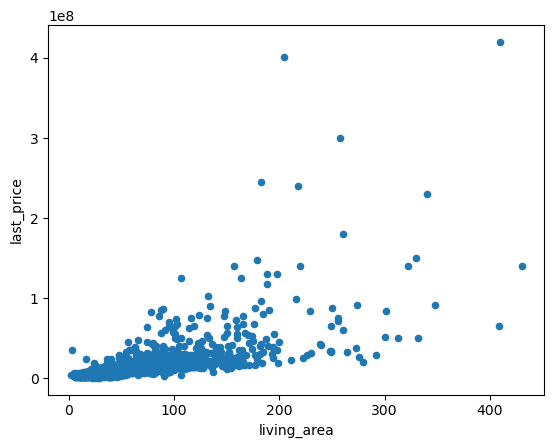

In [67]:
price_on_living_area.plot(x='living_area', y='last_price', kind='scatter')

In [68]:
print(price_on_living_area['living_area'].corr(price_on_living_area['last_price']))

0.6776064446095135


Как и в случае с общей площадью, чем больше жилая площадь, тем больше цена за квартиру.

##### 4.3.3 Зависимость цены от площади кухни.

In [69]:
price_on_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index()
price_on_kitchen_area

,kitchen_area,last_price
0,0.000000,2700000.0
1,1.300000,4250000.0
2,2.000000,2720000.0
3,2.300000,2940000.0
4,2.400000,2200000.0
...,...,...
1831,100.000000,65000000.0
1832,100.700000,12500000.0
1833,107.000000,85000000.0
1834,112.000000,420000000.0


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

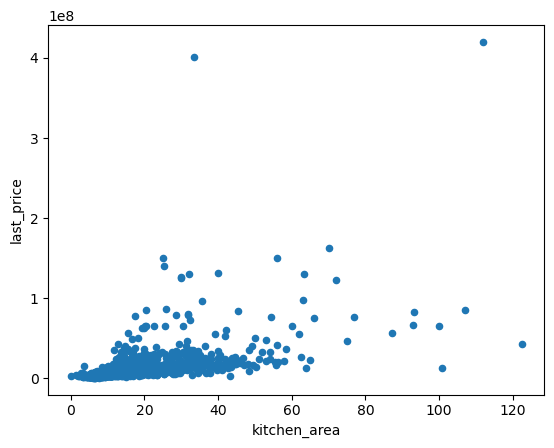

In [71]:
price_on_kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter')

In [72]:
print(price_on_kitchen_area['kitchen_area'].corr(price_on_kitchen_area['last_price']))

0.5637511053077838


Как и в случае с общей площадью, чем больше площадь кухни, тем больше цена за квартиру, но корреляция по коэффициенту Пирсона не такая сильная и составляет всего 0,56.

##### 4.3.4 Зависимость цены от количества комнат.

In [73]:
price_on_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()
price_on_rooms

,rooms,last_price
0,0,2700000
1,1,3600000
2,2,4772669
3,3,6200000
4,4,9000000
5,5,14000000
6,6,19000000
7,7,24900000
8,8,23095000
9,9,23750000


<AxesSubplot:xlabel='rooms'>

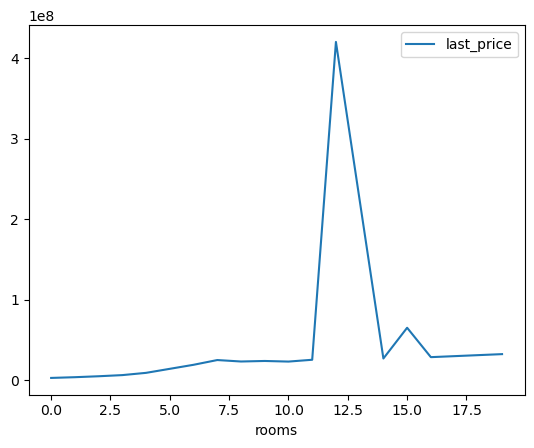

In [74]:
price_on_rooms.plot(x='rooms', y='last_price', kind='line')

In [75]:
print(price_on_rooms['rooms'].corr(price_on_rooms['last_price']))

0.28609757818635584


В целом можно сказать, что чем больше комнат в квартире, тем больше она будет стоить, но здесь еще смежным особо влияющим фактором является площадь квартиры, а коэффициент Пирсона мал и составляет 0,28.

##### 4.3.5 Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой).

In [76]:
price_on_type_of_floor = data.pivot_table(index='type_of_floor', values='last_price', aggfunc='median')
price_on_type_of_floor

,last_price
type_of_floor,
другой,4850000
первый,3900000
последний,4300000


<AxesSubplot:xlabel='type_of_floor'>

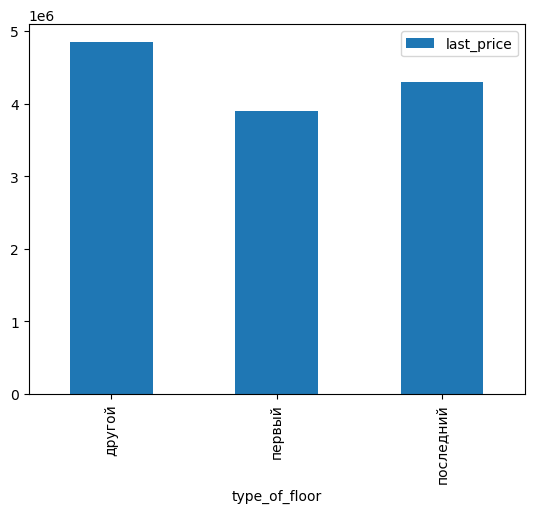

In [77]:
price_on_type_of_floor.plot(kind='bar')

Квартиры дешевле на первых и последних этажах, а на других — дороже.

##### 4.3.6 Зависимость цены от дня недели размещения.

In [78]:
price_on_day_week_exposition = data.pivot_table(index='day_week_exposition', values='last_price', aggfunc='median')
price_on_day_week_exposition

,last_price
day_week_exposition,
0,4650000
1,4730000
2,4700000
3,4650000
4,4585000
5,4555000
6,4550000


<AxesSubplot:xlabel='day_week_exposition'>

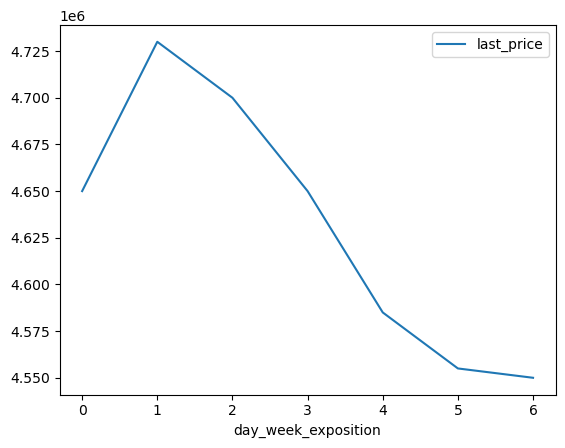

In [79]:
price_on_day_week_exposition.plot(kind='line')

Самые дорогие квартиры публикуются по вторникам, к концу недели стоимость идет на спад.

##### 4.3.7 Зависимость цены от месяца размещения.

In [80]:
price_on_month_exposition = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
price_on_month_exposition

,last_price
month_exposition,
1,4600000
2,4650000
3,4650000
4,4800000
5,4515000
6,4400000
7,4650000
8,4570000
9,4700000


<AxesSubplot:xlabel='month_exposition'>

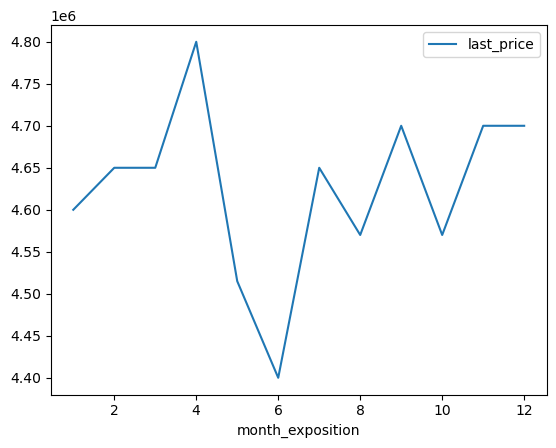

In [81]:
price_on_month_exposition.plot(kind='line')

Дешевле всего квартиры, публикация которых состоялась в июне, а дороже всего — в апреле.

##### 4.3.8 Зависимость цены от года размещения.

In [82]:
price_on_year_exposition = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
price_on_year_exposition

,last_price
year_exposition,
2014,7700000
2015,5350000
2016,4550000
2017,4500000
2018,4550000
2019,5050000


<AxesSubplot:xlabel='year_exposition'>

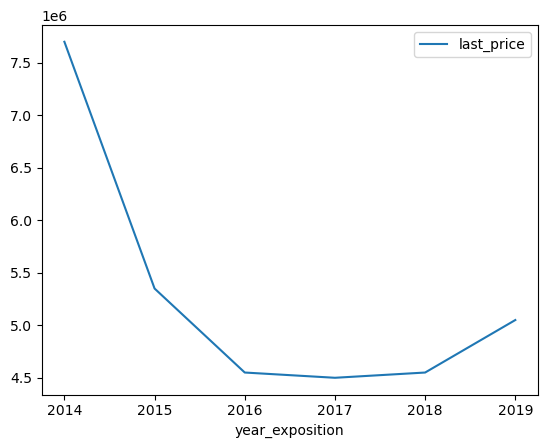

In [83]:
price_on_year_exposition.plot(kind='line')

На графике можно заметить спад цен на квартиры с 2014 года по 2017 год, а затем снова рост с 2017 года по 2019 год.

In [84]:
area_on_year_exposition = data.pivot_table(index='year_exposition', values='total_area', aggfunc='median')
area_on_year_exposition

,total_area
year_exposition,
2014,76.26
2015,60.00
2016,53.10
2017,52.00
2018,50.50
2019,52.00


<AxesSubplot:xlabel='year_exposition'>

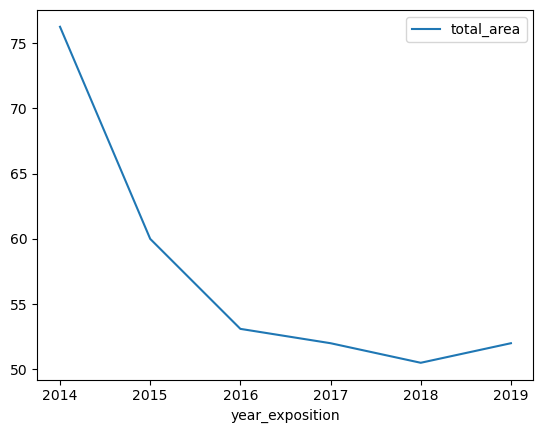

In [85]:
area_on_year_exposition.plot(kind='line')

График зависимости средней площади от года размещения объявления и график зависимости средней цены квартир от года размещения объявления почти похожи по спаду и росту. Выходит, что год размещения объявления не влияет столько на цену, сколько влияет площадь.

#### 4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

Составим сводную таблицу по названиям населенных пунктов `locality_name`, взяв данные из столбца цен за квадратный метр`meter_price`, а также использовав функции `count` и `mean` для количества объявлений и среднего значения цены за квадратный метр по населенному пункту соответственно.

In [86]:
mean_price = data.pivot_table(
    index='locality_name', 
    values='meter_price', 
    aggfunc=['count', 'mean'],
).rename(
    columns={'count': 'ads_amount', 'mean': 'mean_price_meter', 'meter_price': ''}
).sort_values(
    by='ads_amount', 
    ascending=False
).head(10)
mean_price

,ads_amount,mean_price_meter
,,
locality_name,,
Санкт-Петербург,15721,114856.115572
Мурино,590,86087.510847
Кудрово,472,95324.928602
Шушары,440,78677.363636
Всеволожск,398,68654.475628
Пушкин,369,103125.818157
Колпино,338,75424.581953
Парголово,327,90175.915291


In [87]:
display(mean_price[mean_price['mean_price_meter'] == mean_price['mean_price_meter'].max()])
display(mean_price[mean_price['mean_price_meter'] == mean_price['mean_price_meter'].min()])

,ads_amount,mean_price_meter
,,
locality_name,,
Санкт-Петербург,15721,114856.115572


,ads_amount,mean_price_meter
,,
locality_name,,
Выборг,237,58141.907173


#### 4.5 Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [88]:
spb_data = data.loc[data['locality_name'] == 'Санкт-Петербург'][ #делаем фильтр на квартиры исключительно из Санкт-Петербурга
    ['last_price', #нам понадобится общая цена
     'cityCenter_km', #и расстояние до центра в километрах
    ] 
].reset_index(drop=True)

#вычисляем цену за километр для каждой квартиры
spb_data['price_km'] = np.round(spb_data['last_price'] / spb_data['cityCenter_km']) 

spb_data

,last_price,cityCenter_km,price_km
0,13000000,16.0,812500.0
1,5196000,14.0,371143.0
2,64900000,7.0,9271429.0
3,10000000,8.0,1250000.0
4,7915000,12.0,659583.0
...,...,...,...
15716,3550000,16.0,221875.0
15717,5500000,6.0,916667.0
15718,9470000,4.0,2367500.0
15719,9700000,4.0,2425000.0


In [89]:
mean_price_km = spb_data.pivot_table(index='cityCenter_km', values='price_km', aggfunc='mean')
mean_price_km['price_km'] = np.round(mean_price_km['price_km'])
mean_price_km

,price_km
cityCenter_km,
1.0,21206721.0
2.0,8894160.0
3.0,3708860.0
4.0,3326070.0
5.0,2899824.0
6.0,2556403.0
7.0,2110736.0
8.0,1244715.0
9.0,774577.0


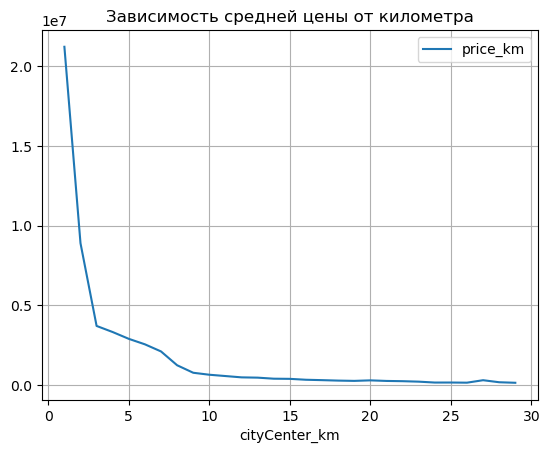

In [90]:
mean_price_km.plot(kind='line', grid=True, title='Зависимость средней цены от километра');

По графику видно, что чем меньше километров от центра, тем дороже в этой области будет стоить жилье.

#### 4.6 Вывод

Наиболее влияющими на стоимость жилья факторами являются:
* общая площадь;
* расстояние до центра (в таких городах, как Санкт-Петербург);
* этаж.

### 5. Общий вывод

В предоставленных данных были обнаружены пропуски, дубликаты и аномальные значения, в связи с чем была проведена предобработка данных:  
* пропущенные значения, которым можно было предложить логичную замену, были заполнены, остальные же изменены на -1;
* неявные дубликаты в столбце с названиями были исправлены с помощью регулярных выражений, явных дубликатов обнаружено не было;
* аномальные значения в столбце с высотой потолков, а также в столбце с ценами были исправлены.
    
Затем для последующего исследовательского анализа данных были добавлены следующие столбцы в датафрейм:
* `meter_price` — цена одного квадратного метра;
* `day_week_exposition` — день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* `month_exposition` — месяц публикации объявления;
* `year_exposition` - год публикации объявления;
* `type_of_floor` — тип этажа квартиры (значения — «первый», «последний», «другой»);
* `cityCenter_km` — расстояние до центра города в километрах.
    
В исследовательском анализе данных были выявлены следующие интересные зависимости, которые существуют на рынке недвижимости:
* чем больше общая площадь, тем дороже жилье;
* чем ближе квартира к центру, тем она дороже;
* на первом и последнем этаже квартиры дешевле;
* в десяти населенных пунктах ленинградской области с наибольшим количеством объявлений максимальная цена за квадратный метр в Санкт-Петербурге, а минимальная в Выборге.
    
Таким образом, на ценообразование жилья влияют площадь и этаж квартиры, расстояние до центра и населенный пункт, где квартира располагается — в больших горродах (как, например, Санкт-Петербург) выше цена за квадратный метр.